# 16-Goals added xGOT vs xG

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.transforms import ScaledTranslation

from PIL import Image
import urllib
import os

In [102]:
# Read CSV as DataFrame called airline_bumping
liga = pd.read_csv("/Users/ligandrosy/Downloads/XGOT1.csv")


In [103]:
liga

,Index,Name,xG,Diff,Goals
0,1,E. Haaland,7.45,3.39,11
1,2,H. Kane,4.91,3.02,6
2,3,Aleksandar Mitrovic,4.74,2.85,6
3,4,Gabriel Jesus,4.69,1.82,4
4,5,Son Heung-Min,2.55,1.54,3
5,6,J. Álvarez,1.06,1.52,2
6,7,Roberto Firmino,3.00,1.39,3
7,8,Mohamed Salah,3.03,1.24,2
8,9,B. Mbeumo,1.32,1.22,2
9,10,M. Ødegaard,1.96,1.09,3


In [104]:
del liga['Index']
liga

,Name,xG,Diff,Goals
0,E. Haaland,7.45,3.39,11
1,H. Kane,4.91,3.02,6
2,Aleksandar Mitrovic,4.74,2.85,6
3,Gabriel Jesus,4.69,1.82,4
4,Son Heung-Min,2.55,1.54,3
5,J. Álvarez,1.06,1.52,2
6,Roberto Firmino,3.00,1.39,3
7,Mohamed Salah,3.03,1.24,2
8,B. Mbeumo,1.32,1.22,2
9,M. Ødegaard,1.96,1.09,3


In [105]:
liga.dtypes['Name']

dtype('O')

In [106]:
liga['Name'] = liga['Name'].astype('string')

In [107]:
liga

,Name,xG,Diff,Goals
0,E. Haaland,7.45,3.39,11
1,H. Kane,4.91,3.02,6
2,Aleksandar Mitrovic,4.74,2.85,6
3,Gabriel Jesus,4.69,1.82,4
4,Son Heung-Min,2.55,1.54,3
5,J. Álvarez,1.06,1.52,2
6,Roberto Firmino,3.00,1.39,3
7,Mohamed Salah,3.03,1.24,2
8,B. Mbeumo,1.32,1.22,2
9,M. Ødegaard,1.96,1.09,3


In [41]:
liga.dtypes['xG']

dtype('float64')

In [43]:
liga.dtypes['Diff']

dtype('float64')

In [ ]:
liga.dtypes['Player']

In [108]:
 liga["xGOT"] = liga["xG"] + liga["Diff"]

In [109]:
liga =liga.sort_values("Diff")

In [110]:
liga["xGOT"] = liga["xGOT"].round(decimals=2)

In [111]:
liga["Name"].iloc[0]

'M. Ødegaard'

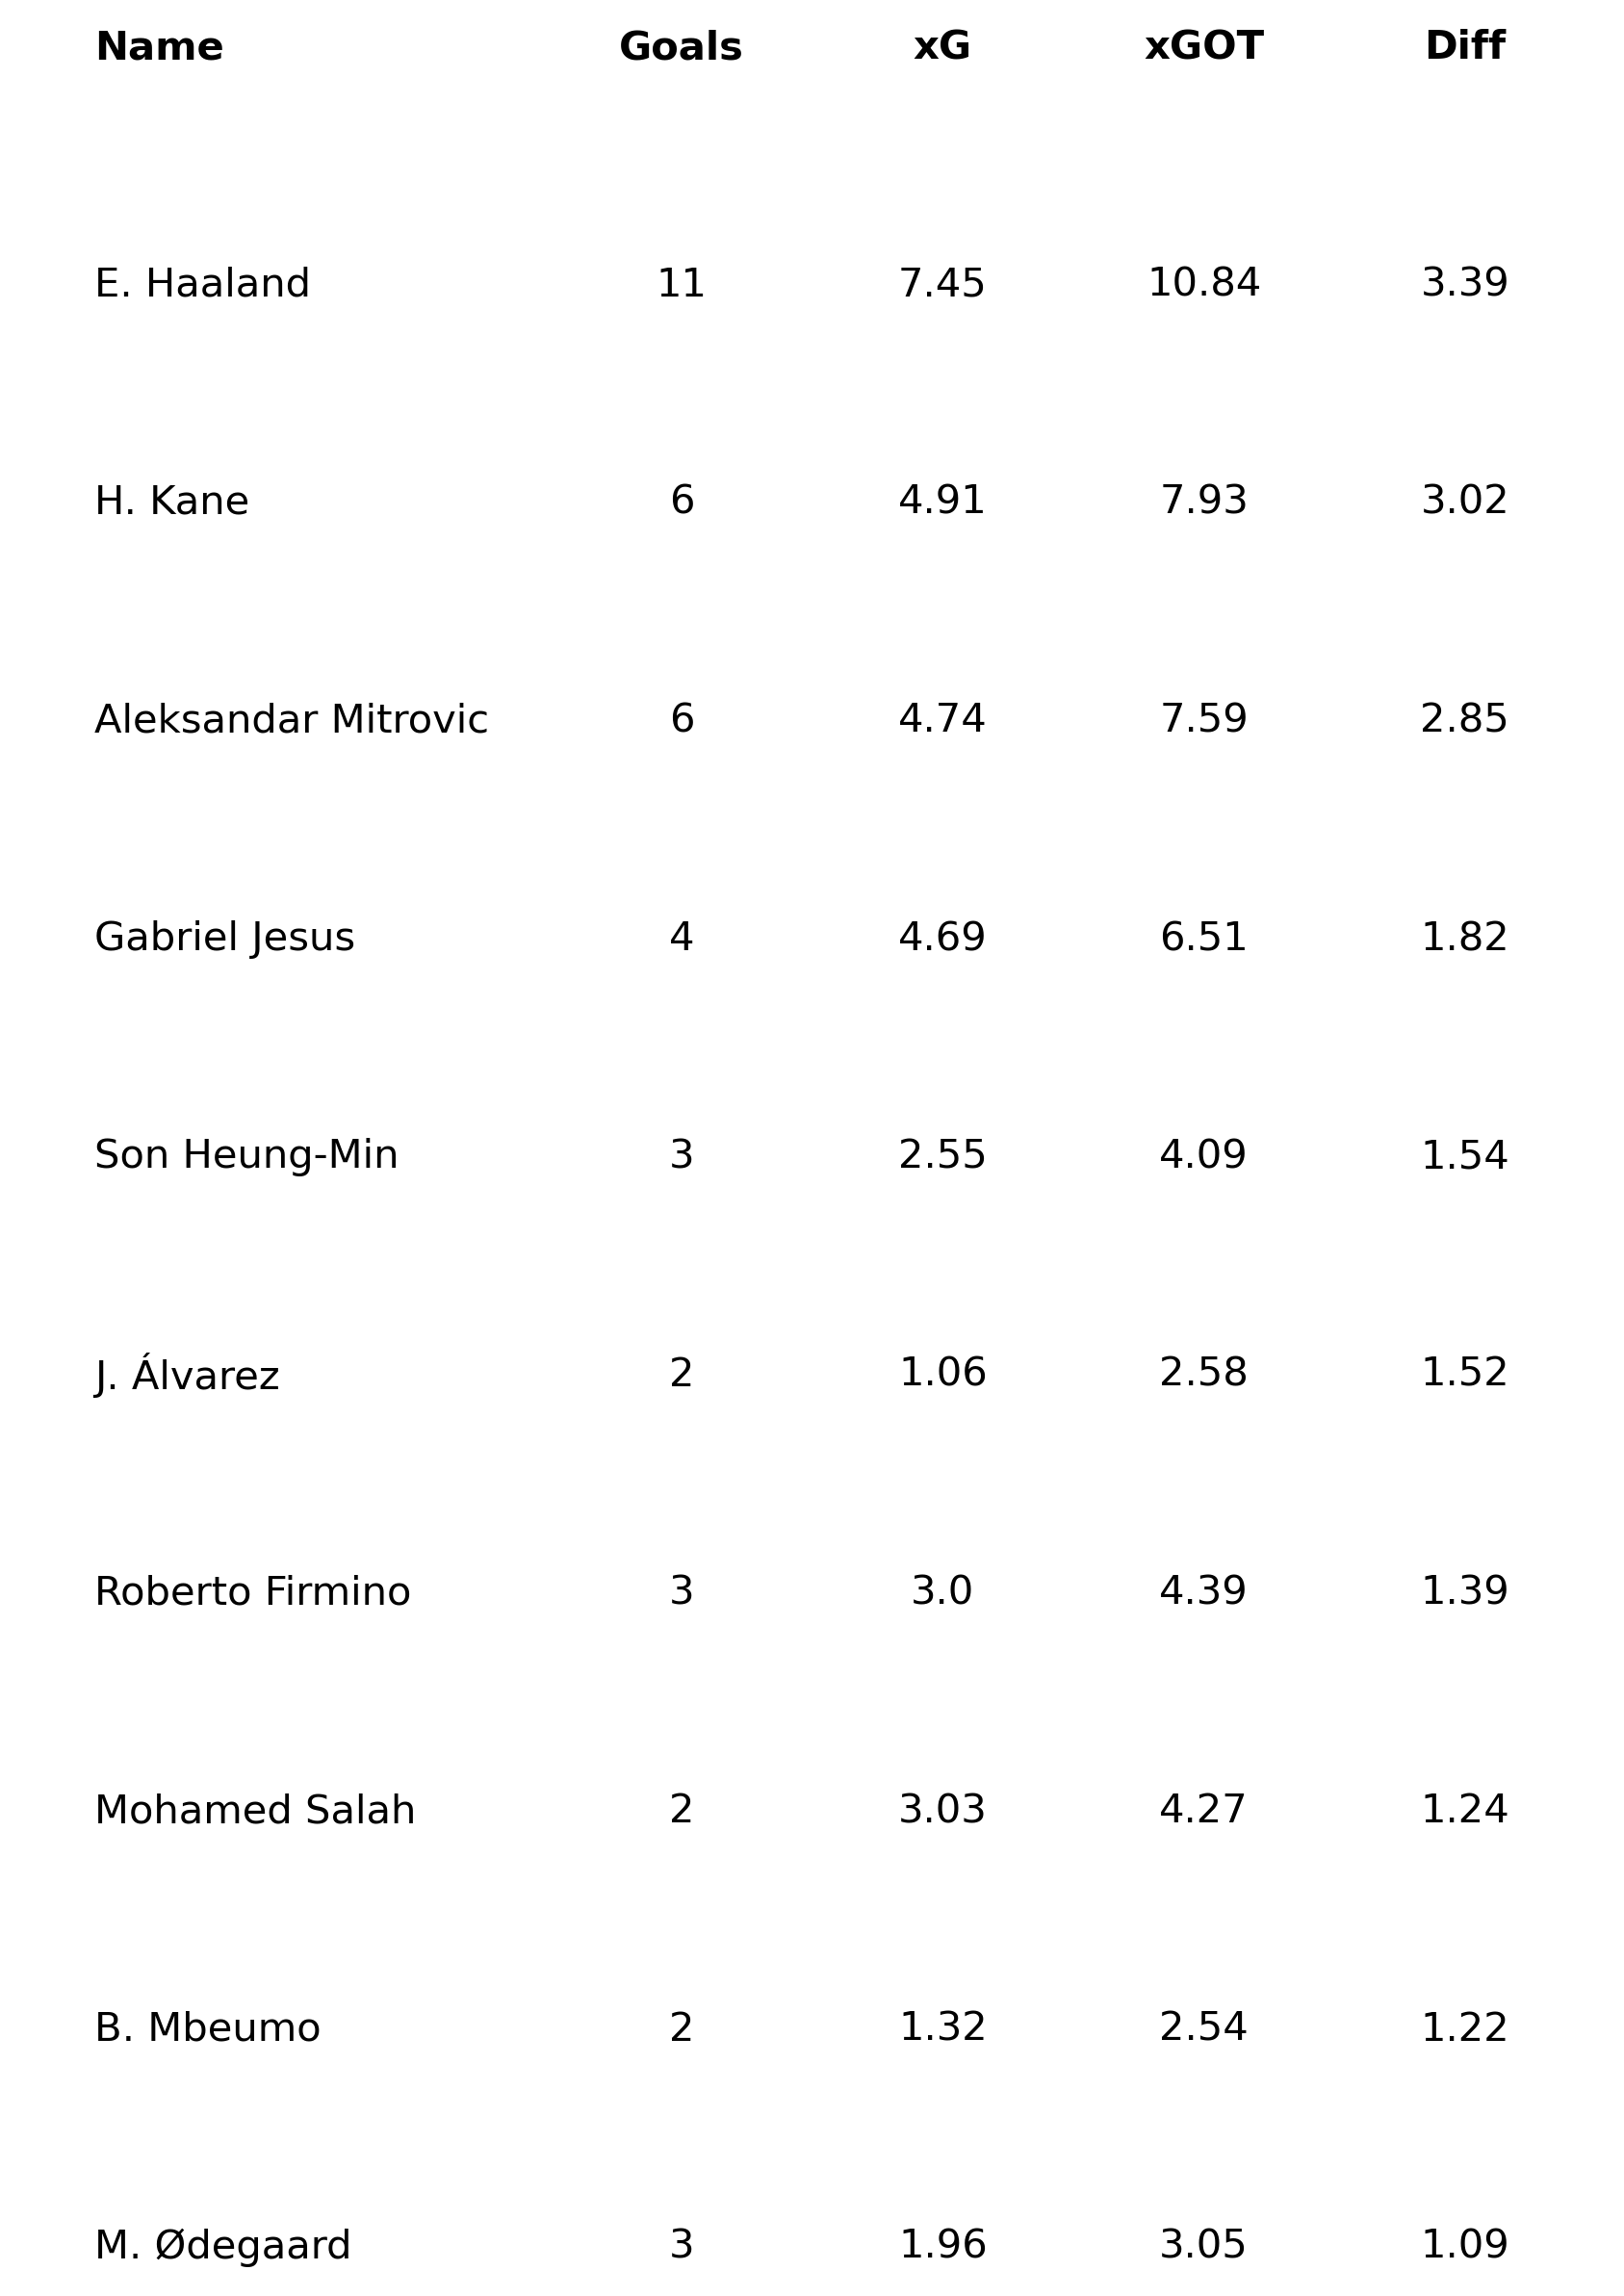

In [125]:
fig = plt.figure(figsize=(7,10), dpi=300)
ax = plt.subplot()

ncols = 5
nrows = liga.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows)


positions = [0.25, 2.5, 3.5, 4.5, 5.5]
columns = ['Name', 'Goals','xG', 'xGOT', 'Diff']

# Add table's main text
for i in range(0,nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[j], i),
            text=liga[column].iloc[i],
            ha=ha,
            va='center'
        )

# Add column names
column_names = ['Name', 'Goals','xG', 'xGOT', 'Diff']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

ax.set_axis_off()




# Adding lines

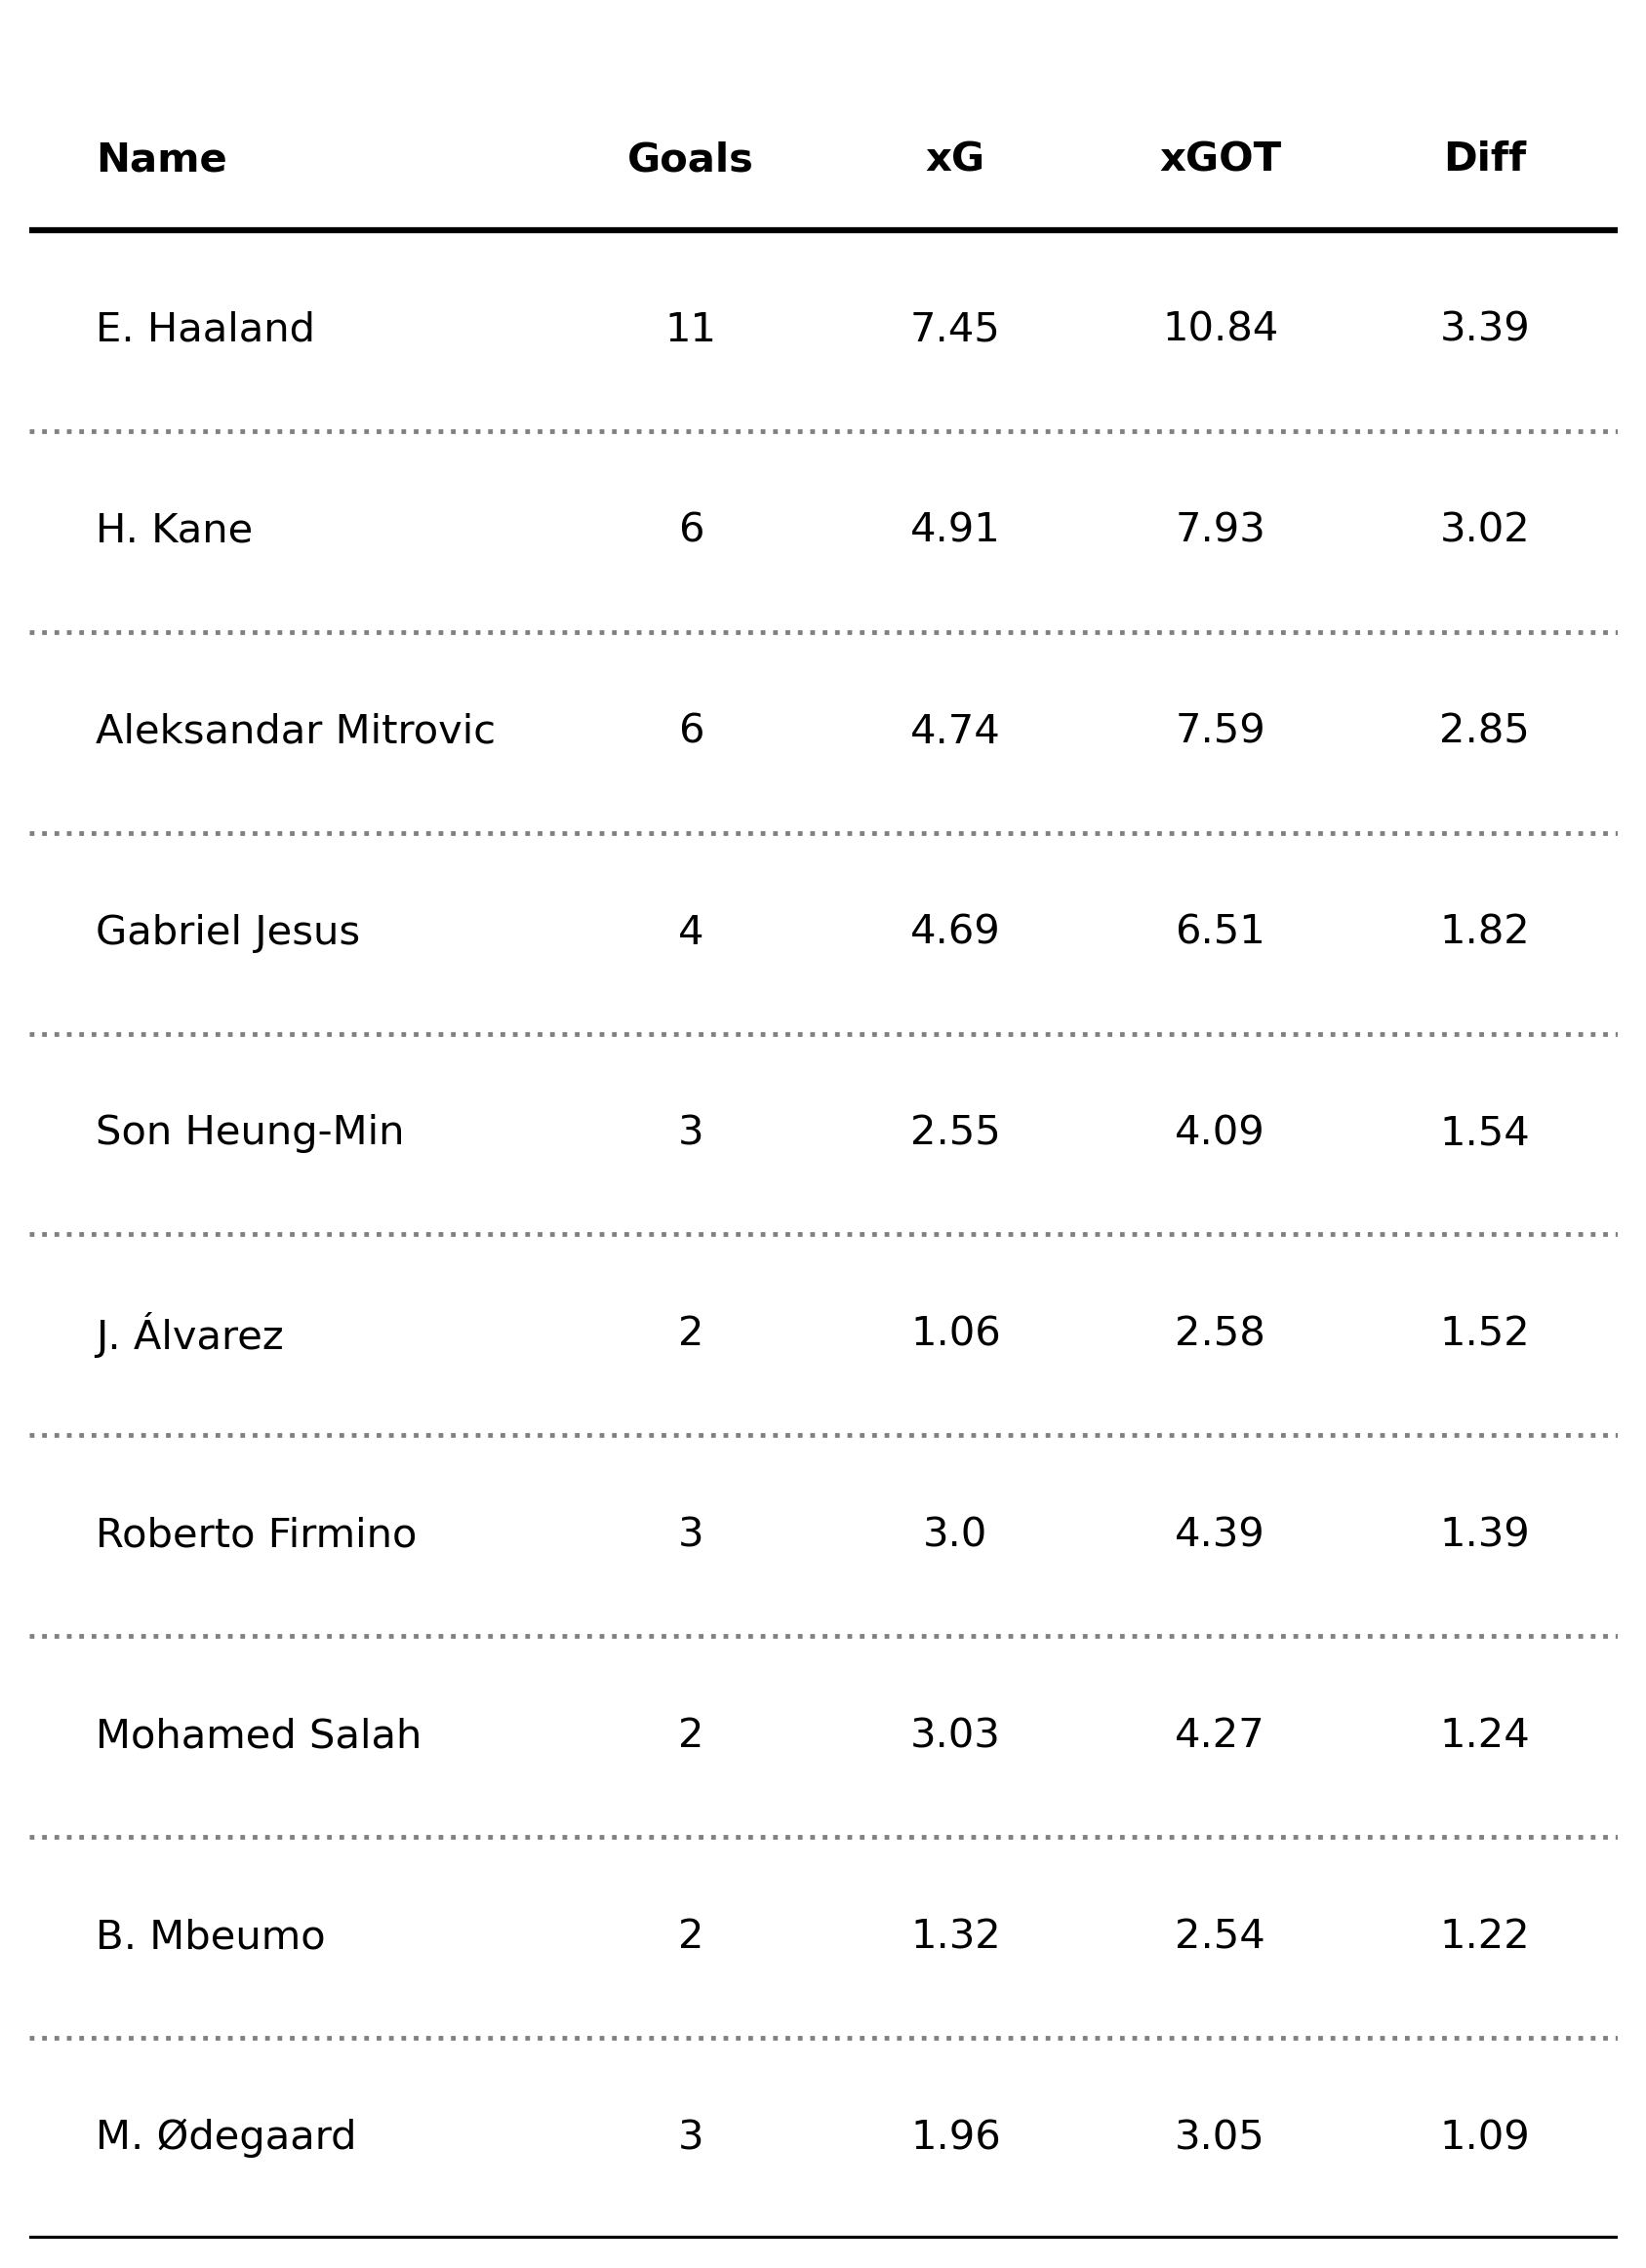

In [126]:
fig = plt.figure(figsize=(7,10), dpi=300)
ax = plt.subplot()

ncols = 5
nrows =liga.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.25, 2.5, 3.5, 4.5, 5.5]
columns = ['Name', 'Goals','xG', 'xGOT', 'Diff']

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        if column == 'Min':
            text_label = f'{liga[column].iloc[i]:,.0f}'
            weight = 'bold'
        else:
            text_label = f'{liga[column].iloc[i]}'
            weight = 'normal'
        ax.annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# Add column names
column_names = ['Name', 'Goals','xG', 'xGOT', 'Diff']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.set_axis_off()


In [127]:
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

In [128]:
codes = { "Liverpool" :8650,  "Manchester City" :  8456,"Arsenal" :9825, "Tottenham" :  8586, "Brighton" :10204,
                      "Leeds" :8463,
                     "Chelsea" :8455,
                  "Brentford" :9937,
           "Newcastle United" :10261,
                     "Fulham" :9879, "Crystal Palace" :9826,
          "Manchester United" :10260,
                     "Everton" :8668,
                 "Southampton":8466,
                 "Aston Villa" :10252,
          "Nottingham Forest":10203,
   "Wolverhampton Wanderers":8602,
                    "West Ham" :8654,
                   "Leicester" : 8197,
               "Bournemouth" :8678}

In [129]:
liga

,Name,xG,Diff,Goals,xGOT,Team
9,M. Ødegaard,1.96,1.09,3,3.05,Arsenal
8,B. Mbeumo,1.32,1.22,2,2.54,Brentford
7,Mohamed Salah,3.03,1.24,2,4.27,Liverpool
6,Roberto Firmino,3.00,1.39,3,4.39,Liverpool
5,J. Álvarez,1.06,1.52,2,2.58,Manchester City
4,Son Heung-Min,2.55,1.54,3,4.09,Tottenham
3,Gabriel Jesus,4.69,1.82,4,6.51,Arsenal
2,Aleksandar Mitrovic,4.74,2.85,6,7.59,Fulham
1,H. Kane,4.91,3.02,6,7.93,Tottenham
0,E. Haaland,7.45,3.39,11,10.84,Manchester City


In [130]:
liga["Team"] = ["Arsenal", "Brentford","Liverpool","Liverpool", 
                "Manchester City","Tottenham","Arsenal","Fulham",
                "Tottenham", "Manchester City"]

In [131]:
liga

,Name,xG,Diff,Goals,xGOT,Team
9,M. Ødegaard,1.96,1.09,3,3.05,Arsenal
8,B. Mbeumo,1.32,1.22,2,2.54,Brentford
7,Mohamed Salah,3.03,1.24,2,4.27,Liverpool
6,Roberto Firmino,3.00,1.39,3,4.39,Liverpool
5,J. Álvarez,1.06,1.52,2,2.58,Manchester City
4,Son Heung-Min,2.55,1.54,3,4.09,Tottenham
3,Gabriel Jesus,4.69,1.82,4,6.51,Arsenal
2,Aleksandar Mitrovic,4.74,2.85,6,7.59,Fulham
1,H. Kane,4.91,3.02,6,7.93,Tottenham
0,E. Haaland,7.45,3.39,11,10.84,Manchester City


In [132]:
clubs = []
for x in (liga["Team"]):
    if x in codes:
        clubs.append(codes[x])

In [133]:
clubs

[9825, 9937, 8650, 8650, 8456, 8586, 9825, 9879, 8586, 8456]

In [153]:
liga["Team"] =["","","","","","","","","",""]

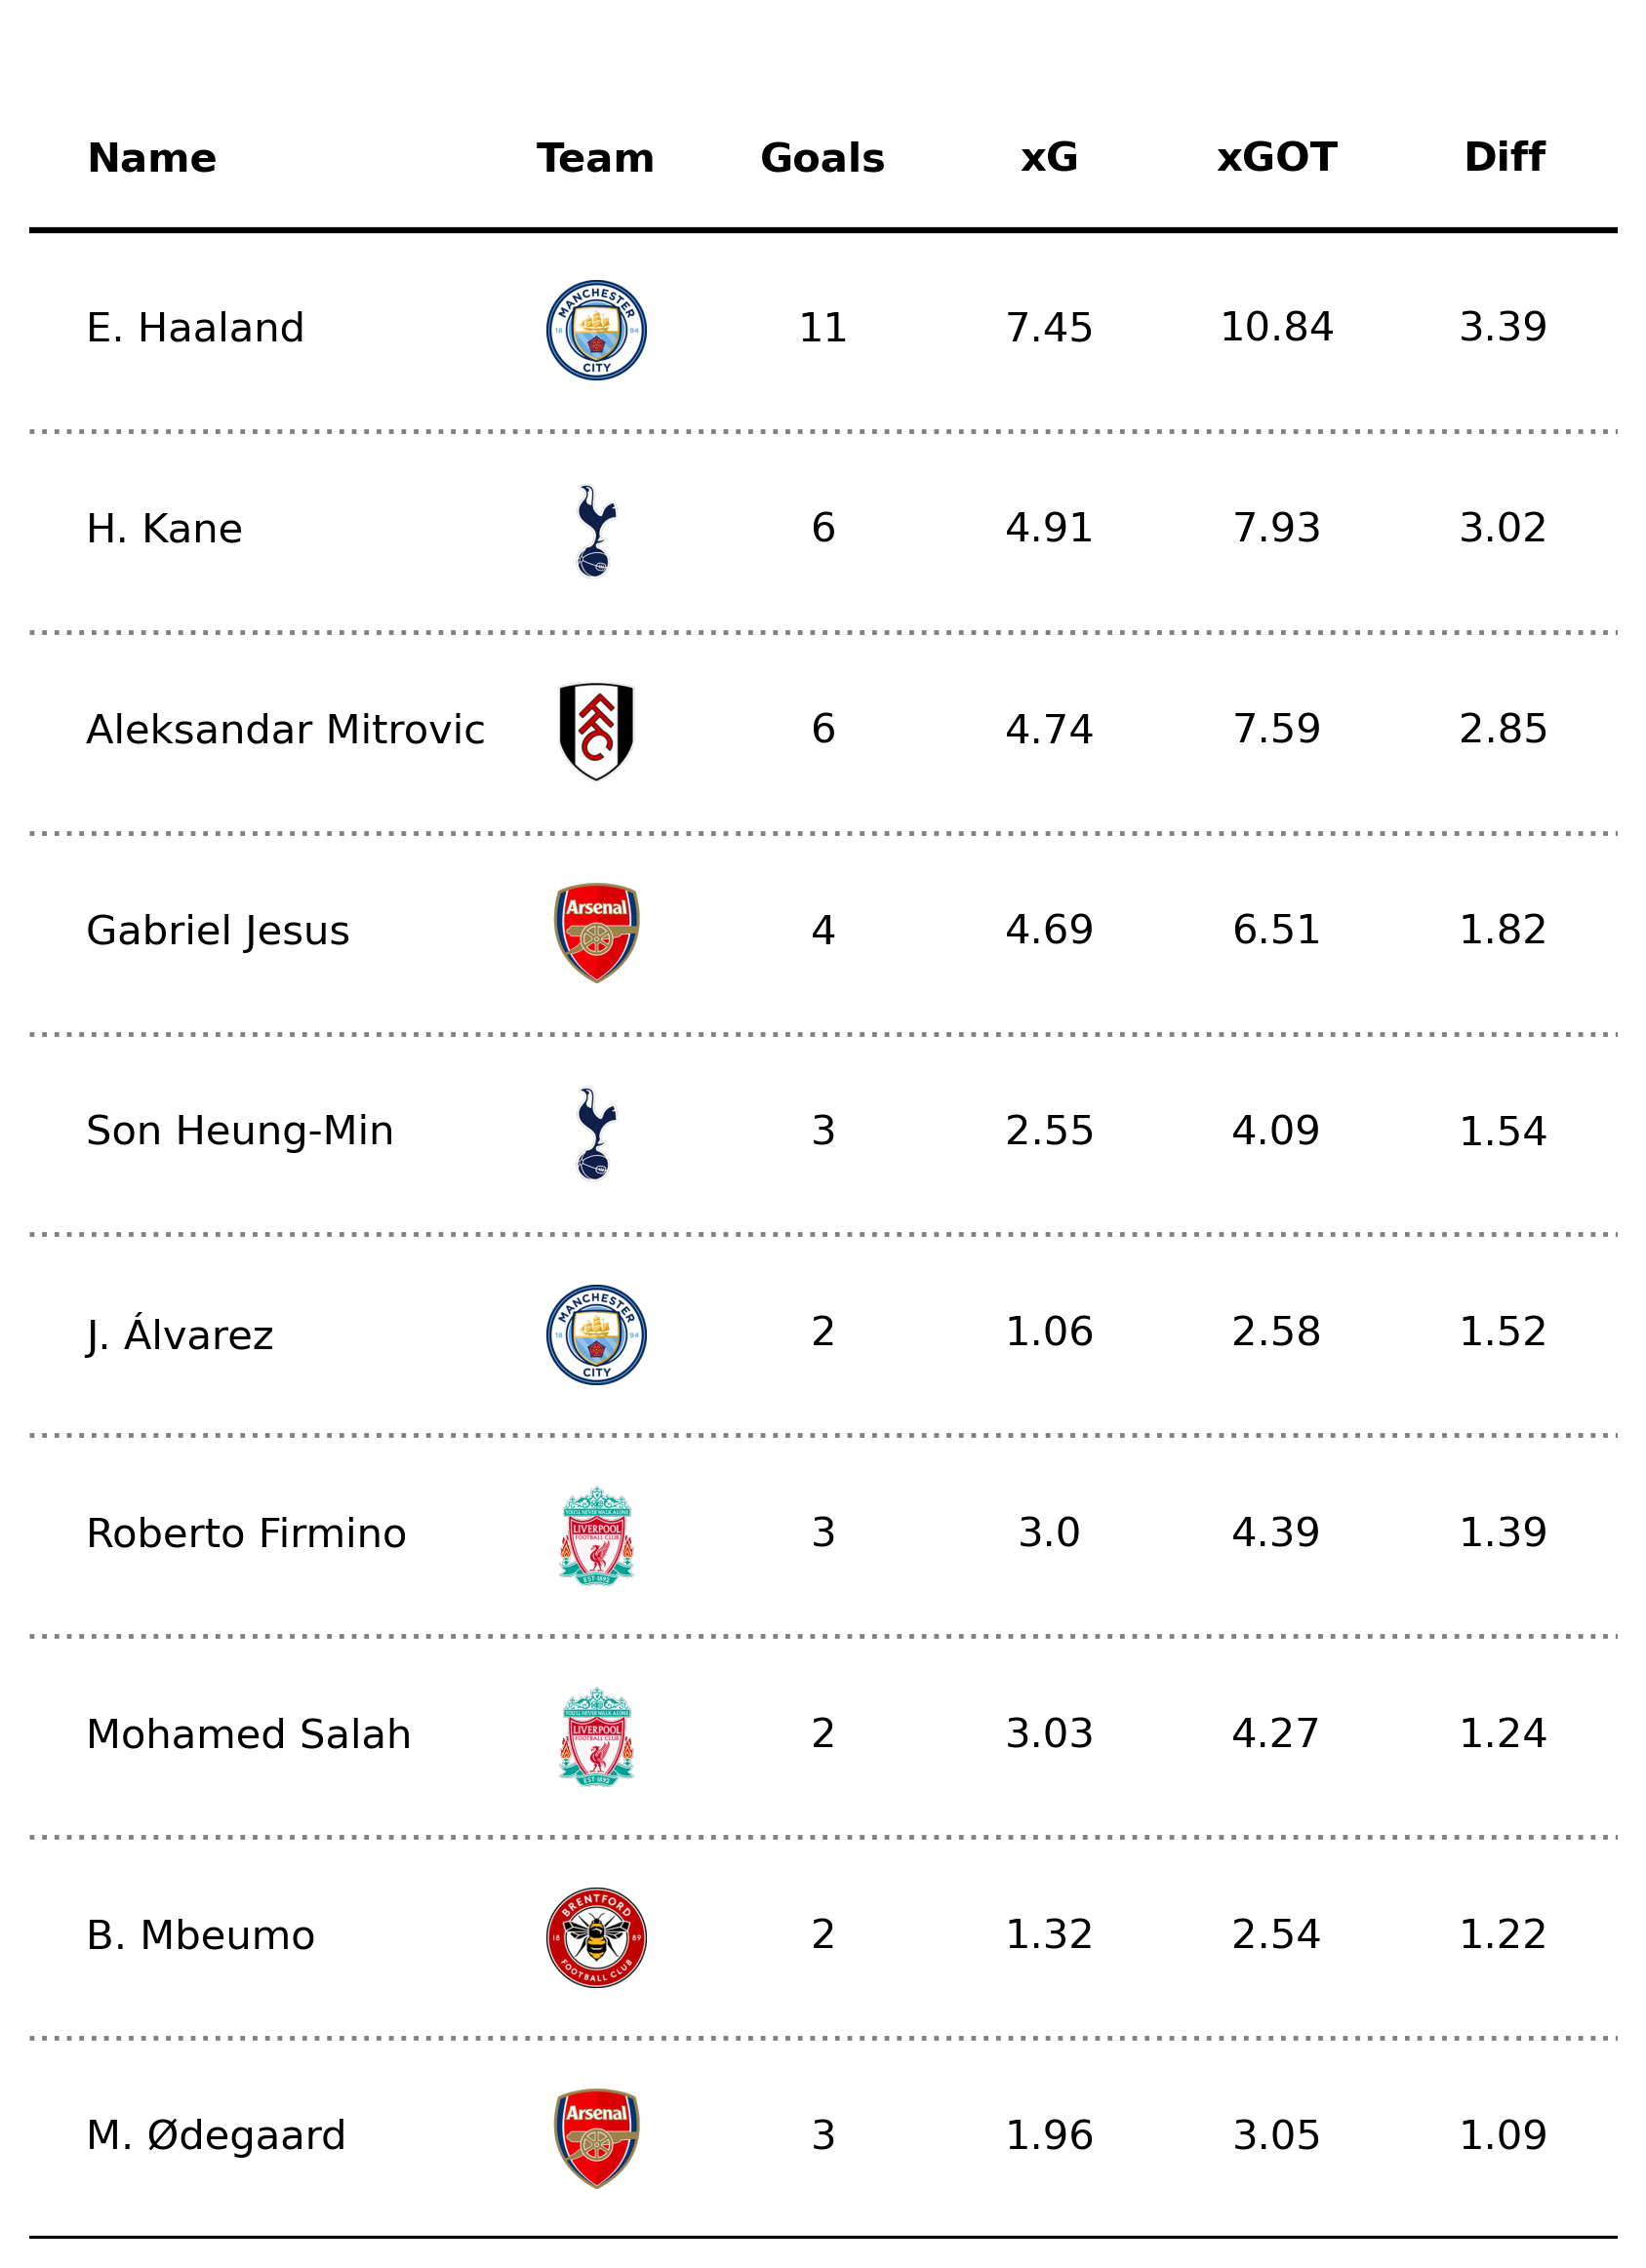

In [154]:
fig = plt.figure(figsize=(7,10), dpi=300)
ax = plt.subplot()

ncols = 6
nrows =liga.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.25, 2.5, 3.5, 4.5, 5.5,6.5]
columns = ['Name','Team', 'Goals','xG', 'xGOT', 'Diff']

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        if column == 'Min':
            text_label = f'{liga[column].iloc[i]:,.0f}'
            weight = 'bold'
        else:
            text_label = f'{liga[column].iloc[i]}'
            weight = 'normal'
        ax.annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# Add column names
column_names = ['Name','Team', 'Goals','xG', 'xGOT', 'Diff']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.set_axis_off()




# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.25])
ax_point_2 = DC_to_NFC([2.75, 0.75])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2.25, x + .25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(clubs[x], flag_ax)

# Adding final touches

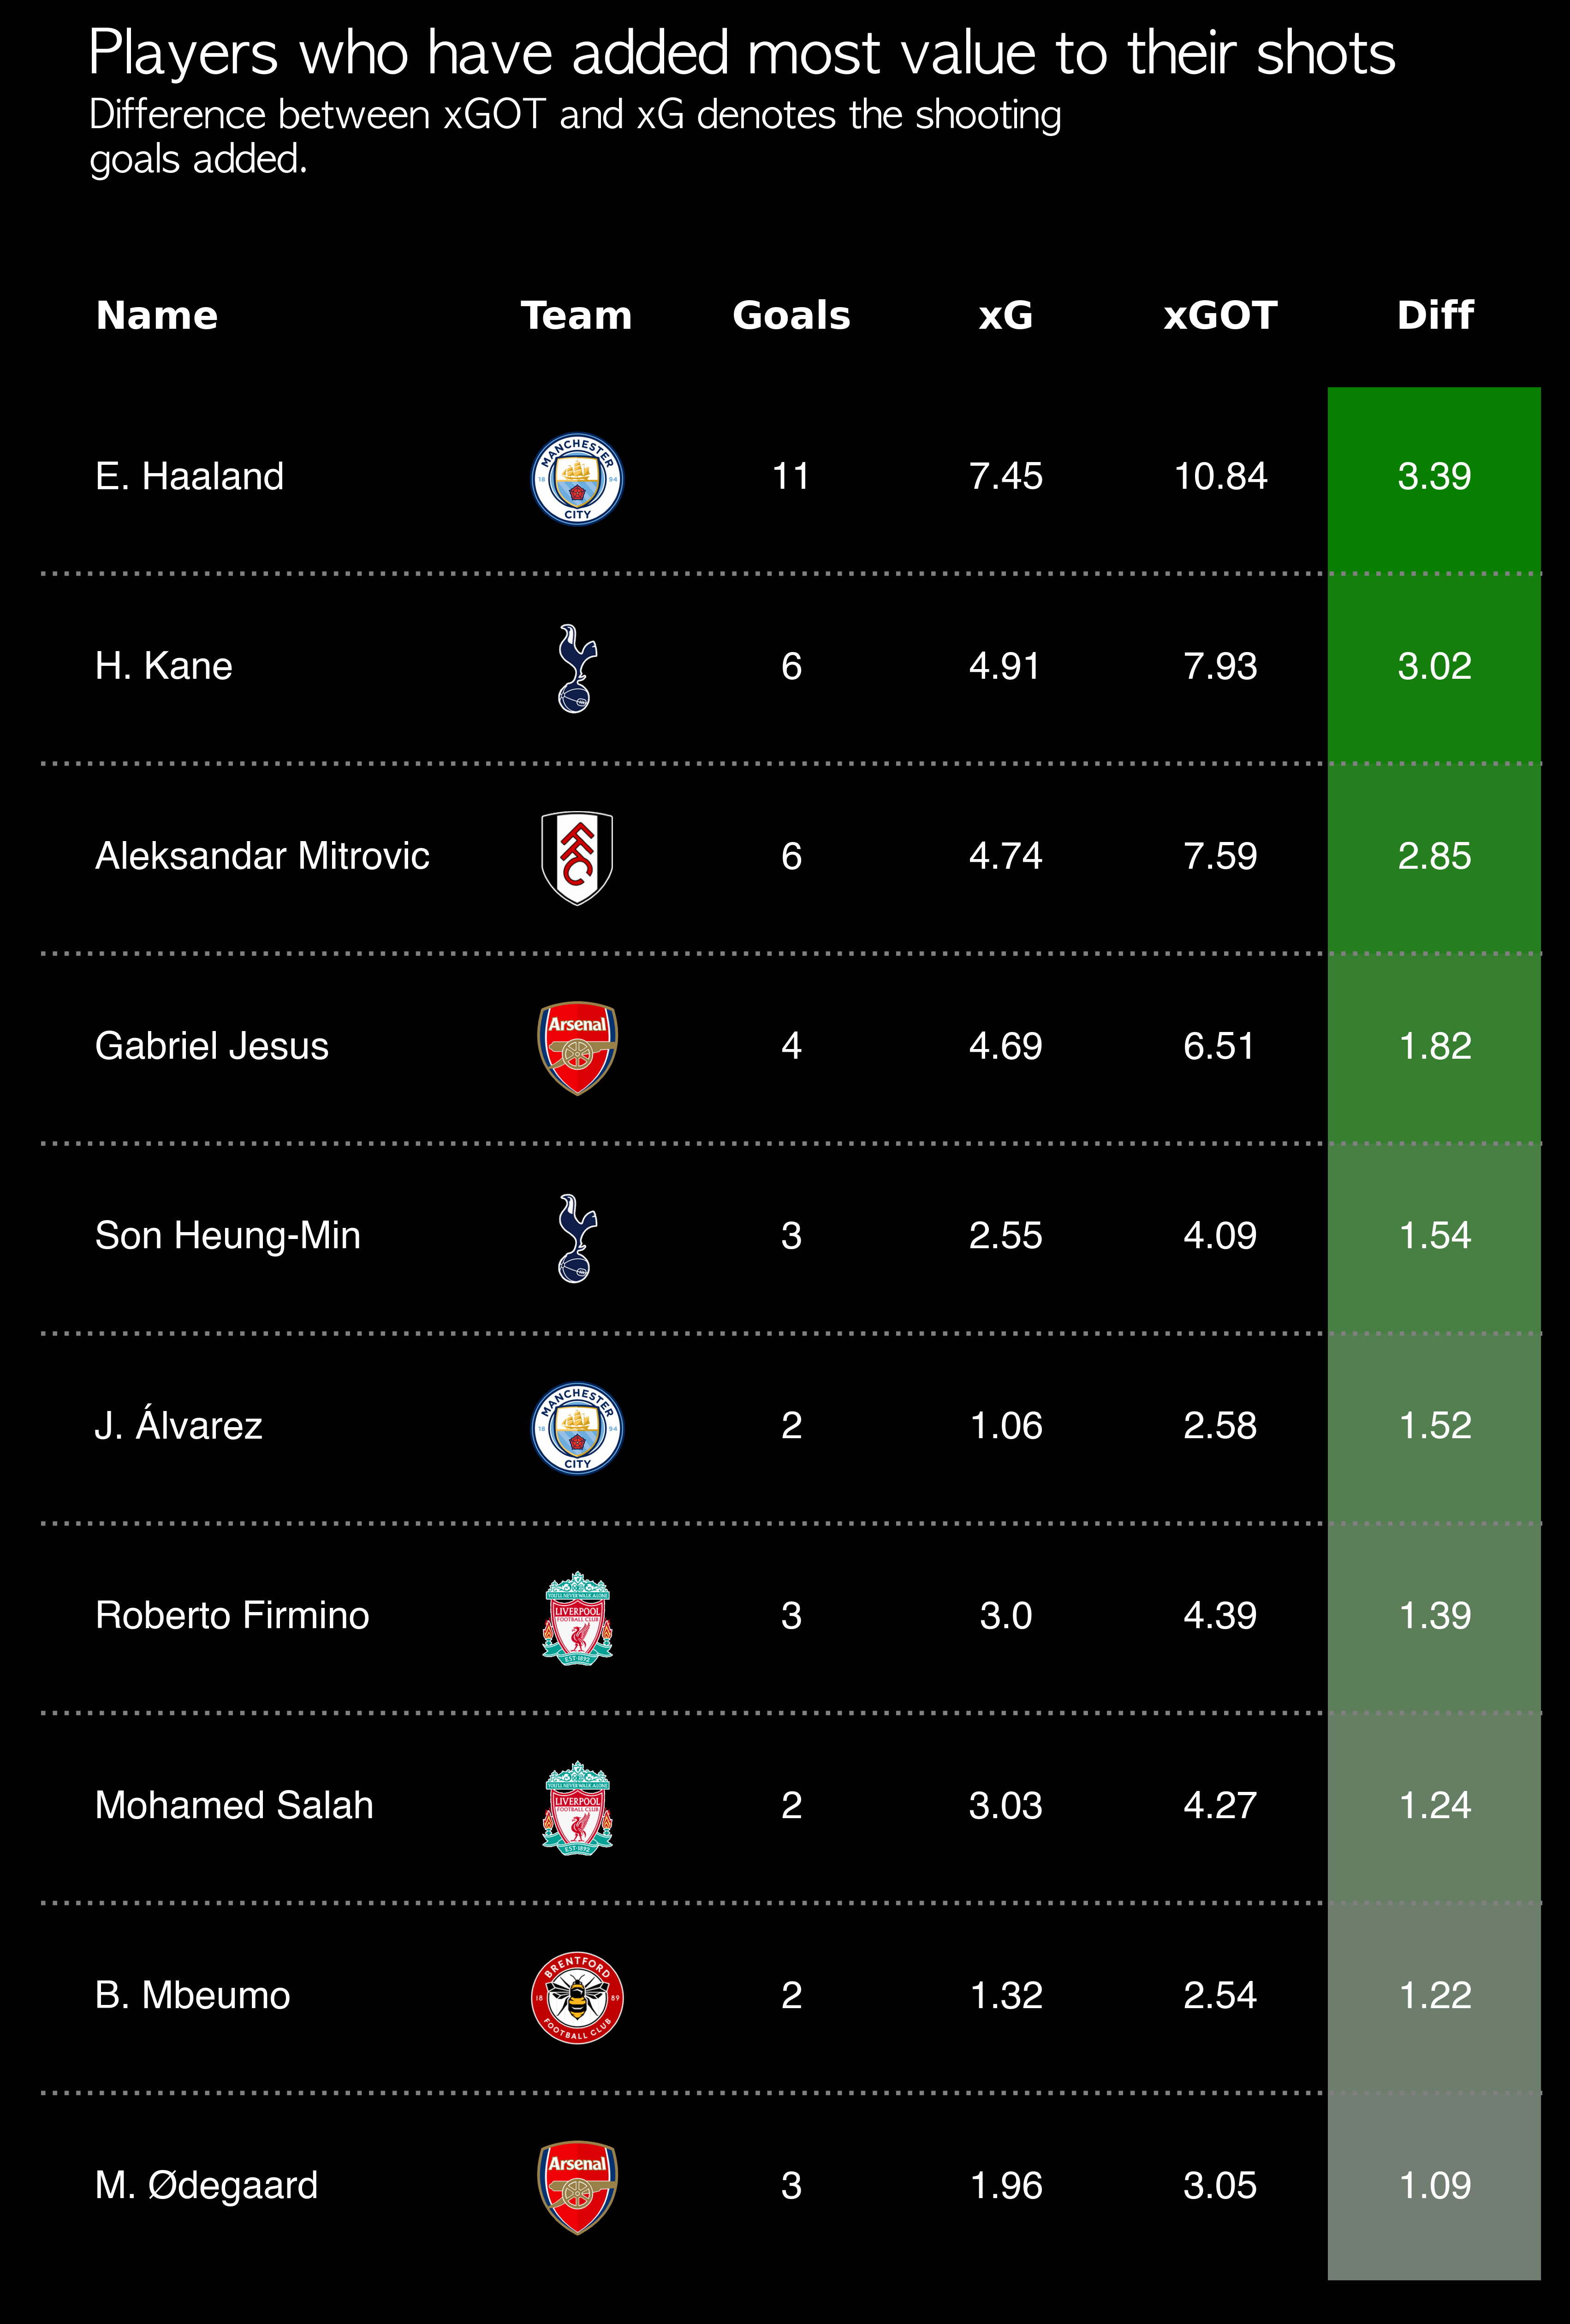

In [208]:
fig = plt.figure(figsize=(7,10), dpi=600)
ax = plt.subplot()

fig.set_facecolor('black')
ax.patch.set_facecolor('black')


ncols = 6
nrows =liga.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.25, 2.5, 3.5, 4.5, 5.5,6.5]
columns = ['Name','Team', 'Goals','xG', 'xGOT', 'Diff']

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        if column == 'Min':
            text_label = f'{liga[column].iloc[i]:,.0f}'
            weight = 'bold'
        else:
            text_label = f'{liga[column].iloc[i]}'
            weight = 'normal'
        ax.annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight,font="Helvetica",color="white"
        )

# Add column names
column_names = ['Name','Team', 'Goals','xG', 'xGOT', 'Diff']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold',color="white"
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')





# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.25])
ax_point_2 = DC_to_NFC([2.75, 0.75])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2.25, x + .25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(clubs[x], flag_ax)

    
#Remove x and y labels ticks
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)


z = 0
list1=[]
for i in range(nrows):
    list1.append(i+0.5)

color = ["#E6FDE5","#DAFFD8","#CCFFC9","#B9FFB4","#A9FFA2","#90FF87","#6DFF61","#4DFF3F","#2BFF1A","#13FF00"]
for y in list1:
    ax.fill_between(
        x=[6,7],
        y1=y-0.5,
        y2=y+0.5,
        color=color[z],
        alpha=0.5,
        ec='None')
    z = z+1

# Info text
fig.text(
    x=0.15, y=.92,
    s='Players who have added most value to their shots',
    ha='left',
    va='bottom',
    size=15,fontname="AppleGothic",fontweight="bold",color="white"
)

fig.text(
    x=0.15, y=.885,
    s='Difference between xGOT and xG denotes the shooting \ngoals added.',
    ha='left',
    va='bottom',
    weight='bold',
    size=3,font="AppleGothic",color="white"
)

fig.savefig("AFC VS ARS.jpg")

In [198]:
list1

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]